# Data cleaning using Melbourne Historic data  

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the dataset

In [2]:
dataset=pd.read_csv('C:/Users/shruti/Desktop/csv files/melb_data.csv')

In [3]:
# to check the top 5 rows of the dataset for getting a rough idea
dataset.head(5)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
dataset.shape

(18396, 22)

In [5]:
#drop the first column because it has values same as index
dataset=dataset.drop(columns=['Unnamed: 0'])

#### To check the datatype of each attribute(feature) in the dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 21 columns):
Suburb           18396 non-null object
Address          18396 non-null object
Rooms            18396 non-null int64
Type             18396 non-null object
Price            18396 non-null float64
Method           18396 non-null object
SellerG          18396 non-null object
Date             18396 non-null object
Distance         18395 non-null float64
Postcode         18395 non-null float64
Bedroom2         14927 non-null float64
Bathroom         14925 non-null float64
Car              14820 non-null float64
Landsize         13603 non-null float64
BuildingArea     7762 non-null float64
YearBuilt        8958 non-null float64
CouncilArea      12233 non-null object
Lattitude        15064 non-null float64
Longtitude       15064 non-null float64
Regionname       18395 non-null object
Propertycount    18395 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.9+ MB


#### After going through datatype of all the features we can see that 'Date' is stored as object type in the dataset but is supposed to be stored in datetime format 

In [7]:
#checking the current datatype of values in 'Date' column
type(dataset['Date'][0])

str

In [8]:
#now we shall apply datetime() to each and every value in 'Date'column
dataset['Date']=dataset['Date'].map(lambda x:pd.to_datetime(x))

In [9]:
dataset['Date'][0] 

Timestamp('2016-03-12 00:00:00')

#### We can take the year value from this date as we already have a feature named yearbuilt so we can build a column names 'year_sold'

In [10]:
dataset['year_sold']=dataset['Date'].apply(lambda x:x.year)

In [11]:
dataset['year_sold'].head()

0    2016
1    2016
2    2017
3    2017
4    2016
Name: year_sold, dtype: int64

In [12]:
# now we can now drop the date column 
dataset=dataset.drop(columns=['Date'])

#### Also we can drop columns like 'Suburb','Address','CouncilArea' and 'Regionname' because according to business analysis and knowledge of features these values dont affect our target variable('Price')

In [13]:
dataset=dataset.drop(columns=['Suburb','Address','CouncilArea','Regionname'])

#### to check whether any feature has null values or not

In [14]:
dataset.isnull().sum()

Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
Lattitude         3332
Longtitude        3332
Propertycount        1
year_sold            0
dtype: int64

## Handling missing values

#### Out of all the features with missing values there are some features with only one missing value . 

In [15]:
#consider 'Distance' and check its quantity of missing values throughout the row
dataset[dataset['Distance'].isnull()]

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,year_sold
14440,2,u,710000.0,S,Jas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


#### Here we can see that almost 50% of the data is missing so we can delete this record (row) completely

In [16]:
dataset=dataset.drop([14440])

In [17]:
dataset.isnull().sum()

Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Distance             0
Postcode             0
Bedroom2          3468
Bathroom          3470
Car               3575
Landsize          4792
BuildingArea     10633
YearBuilt         9437
Lattitude         3331
Longtitude        3331
Propertycount        0
year_sold            0
dtype: int64

In [18]:
# FOR BEDROOM2 FEATURE
mean=dataset['Bedroom2'].mean()

In [19]:
dataset['Bedroom2'].fillna(mean,inplace=True)

In [20]:
#FOR BATHROOM FEATURE
dataset['Bathroom'].value_counts()

1.0    8193
2.0    5532
3.0    1013
4.0     114
0.0      34
5.0      30
6.0       5
7.0       2
8.0       2
Name: Bathroom, dtype: int64

#### Here there are values getting repeated in different frequencies so the missing values can be replaced using mode(most frequent element)

In [21]:
dataset['Bathroom'].mode()

0    1.0
dtype: float64

In [22]:
dataset['Bathroom'].fillna(dataset['Bathroom'].mode()[0],inplace=True)

In [23]:
dataset.isnull().sum()

Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car               3575
Landsize          4792
BuildingArea     10633
YearBuilt         9437
Lattitude         3331
Longtitude        3331
Propertycount        0
year_sold            0
dtype: int64

In [24]:
#FOR CAR FEATURE
dataset['Car'].value_counts()

2.0     6183
1.0     6072
0.0     1057
3.0      809
4.0      549
5.0       66
6.0       60
8.0       12
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [25]:
mode_car=dataset['Car'].mode()

In [26]:
mode_car

0    2.0
dtype: float64

In [27]:
dataset['Car'].fillna(mode_car[0],inplace=True)

In [28]:
mean_land=dataset['Landsize'].mean()

In [29]:
dataset['Landsize'].fillna(mean_land,inplace=True)

In [30]:
dataset['BuildingArea'].fillna(dataset['BuildingArea'].mean(),inplace=True)

In [31]:
dataset['YearBuilt'].fillna(dataset['YearBuilt'].mode()[0],inplace=True)

#### Let us observe the relationship between lattitude and longtitude with the target variable i.e ' Price ' 

Text(0, 0.5, 'Price')

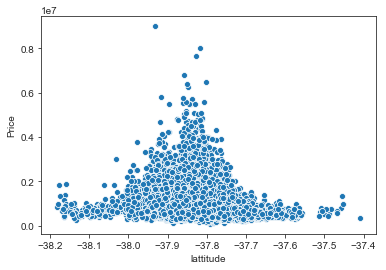

In [32]:
sns.set_style('ticks')
sns.scatterplot(x=dataset['Lattitude'],y=dataset['Price'])
plt.xlabel('lattitude')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

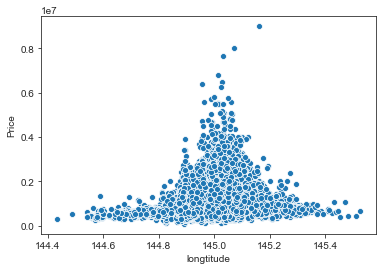

In [33]:
sns.set_style('ticks')
sns.scatterplot(x=dataset['Longtitude'],y=dataset['Price'])
plt.xlabel('longtitude')
plt.ylabel('Price')

#### We can see here there is no linear relationship between lattitude and price and same goes for longtitude with price.So we can drop these two columns as changes in their values wont affect our target variable

In [34]:
dataset=dataset.drop(columns=['Lattitude','Longtitude'])

In [35]:
dataset.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Propertycount    0
year_sold        0
dtype: int64

## Encoding categorical features to numeric values

In [36]:
#checking the non-numeric features in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18395 entries, 0 to 18395
Data columns (total 15 columns):
Rooms            18395 non-null int64
Type             18395 non-null object
Price            18395 non-null float64
Method           18395 non-null object
SellerG          18395 non-null object
Distance         18395 non-null float64
Postcode         18395 non-null float64
Bedroom2         18395 non-null float64
Bathroom         18395 non-null float64
Car              18395 non-null float64
Landsize         18395 non-null float64
BuildingArea     18395 non-null float64
YearBuilt        18395 non-null float64
Propertycount    18395 non-null float64
year_sold        18395 non-null int64
dtypes: float64(10), int64(2), object(3)
memory usage: 2.2+ MB


#### Type,Method and SellerG are the three features of object type and are supposed to be converted into numeric type before giving the dataset to the model for training

In [37]:
dataset['Type'].value_counts()

h    12095
u     4295
t     2005
Name: Type, dtype: int64

#### Performing label encoding using sklearn

In [38]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
dataset['Type']=label.fit_transform(dataset['Type'])

In [39]:
dataset['Method'].value_counts()

S     12033
SP     2349
PI     2189
VB     1696
SA      128
Name: Method, dtype: int64

In [40]:
dataset['Method']=label.fit_transform(dataset['Method'])

In [41]:
dataset['Method'].head()

0    1
1    1
2    3
3    0
4    4
Name: Method, dtype: int32

In [42]:
len(dataset['SellerG'].value_counts())

305

In [43]:
#FOR SELLERG FEATURE
import category_encoders as ce

In [44]:
#Applying binary encoder 
enc=ce.BinaryEncoder(cols=['SellerG'])

In [45]:
df_bin=enc.fit_transform(dataset)

In [46]:
df_bin

,Rooms,Type,Price,Method,SellerG_0,SellerG_1,SellerG_2,SellerG_3,SellerG_4,SellerG_5,...,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,year_sold
0,2,0,1480000.0,1,0,0,0,0,0,0,...,2.5,3067.0,2.000000,1.0,1.0,202.000000,151.220219,1970.0,4019.0,2016
1,2,0,1035000.0,1,0,0,0,0,0,0,...,2.5,3067.0,2.000000,1.0,0.0,156.000000,79.000000,1900.0,4019.0,2016
2,3,0,1465000.0,3,0,0,0,0,0,0,...,2.5,3067.0,3.000000,2.0,0.0,134.000000,150.000000,1900.0,4019.0,2017
3,3,0,850000.0,0,0,0,0,0,0,0,...,2.5,3067.0,3.000000,2.0,1.0,94.000000,151.220219,1970.0,4019.0,2017
4,4,0,1600000.0,4,0,0,0,0,0,0,...,2.5,3067.0,3.000000,1.0,2.0,120.000000,142.000000,2014.0,4019.0,2016
5,2,0,941000.0,1,0,0,0,0,0,0,...,2.5,3067.0,2.000000,1.0,0.0,181.000000,151.220219,1970.0,4019.0,2016
6,3,0,1876000.0,1,0,0,0,0,0,0,...,2.5,3067.0,4.000000,2.0,0.0,245.000000,210.000000,1910.0,4019.0,2016
7,2,0,1636000.0,1,0,0,0,0,0,0,...,2.5,3067.0,2.000000,1.0,2.0,256.000000,107.000000,1890.0,4019.0,2016
8,3,0,1000000.0,1,0,0,0,0,0,0,...,2.5,3067.0,2.913043,1.0,2.0,558.116371,151.220219,1970.0,4019.0,2016
9,2,1,745000.0,1,0,0,0,0,0,0,...,2.5,3067.0,2.913043,1.0,2.0,558.116371,151.220219,1970.0,4019.0,2016


#### So this is how we got a cleaned dataset ready for giving it to the model !